## BA无标度网络的度动力学

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def barabasi_albert_graph(n0, n, m, i0, i1, i2):
    # 假定初始网络是一个包含n0个节点的完全网络
    G = nx.complete_graph(n0)
    targets = list(range(m))
    repeated_nodes = list(range(n0))*m
    source = n0
    deg_i0 = []
    deg_i1 = []
    deg_i2 = []
    while source < n:
        degree_list = [G.degree(i) for i in G.nodes()]
        if i0 < len(G.nodes()):
            deg_i0.append(degree_list[i0])
        if i1 < len(G.nodes()):
            deg_i1.append(degree_list[i1])
        if i2 < len(G.nodes()):
            deg_i2.append(degree_list[i2])
        G.add_edges_from(zip([source] * m, targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * m)
        targets = random.sample(repeated_nodes, m)
        targets = set(targets)
        while len(targets) < m:
            x = random.choice(repeated_nodes)
            targets.add(x)
        source += 1
    return G, deg_i0, deg_i1, deg_i2

#### 单个样本

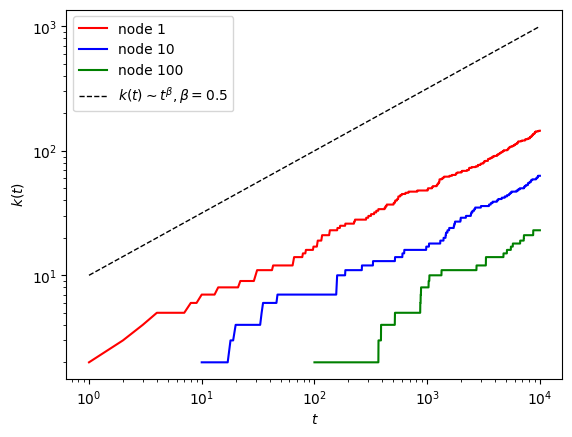

In [6]:
n0 = 3
m = 2
n = 10000

# 设置指定节点的适应度值
i0, i1, i2 = 1, 10, 100

G, deg_i0, deg_i1, deg_i2 = barabasi_albert_graph(n0, n, m, i0, i1, i2)

x = list(range(1,n+1))
xx0 = np.arange(x[0], x[len(x) - 1], 0.01)
yy0 = (10 ** 1) * xx0 ** (0.5)

# 绘制指定节点的度与时间的依赖关系
plt.plot(range(i0, i0+len(deg_i0)), deg_i0, 'r-', label='node '+str(i0))
plt.plot(range(i1, i1+len(deg_i1)), deg_i1, 'b-', label='node '+str(i1))
plt.plot(range(i2, i2+len(deg_i2)), deg_i2, 'g-', label='node '+str(i2))
plt.plot(xx0, yy0, "k--", linewidth=1.0, label=r'$k(t) \sim t^{\beta}, \beta = 0.5$')

plt.legend(loc=0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('$t$')
plt.ylabel('$k(t)$')
plt.show()

#### 多个样本的统计平均值

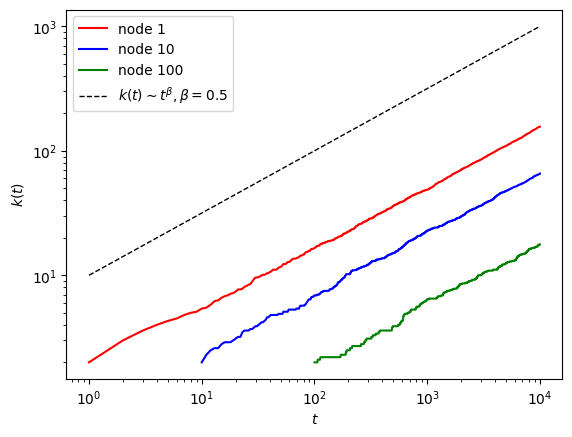

In [7]:
n0 = 3
m = 2
n = 10000

# 设置指定节点的适应度值
i0, i1, i2 = 1, 10, 100

samples = 10
y0 = np.zeros(9997)
y1 = np.zeros(9989)
y2 = np.zeros(9899)
for i in range(samples):
    G, deg_i0, deg_i1, deg_i2 = barabasi_albert_graph(n0, n, m, i0, i1, i2)
    y0 += np.array(deg_i0)
    y1 += np.array(deg_i1)
    y2 += np.array(deg_i2)

# print(len(deg_i0),len(deg_i1),len(deg_i2))

x = list(range(1,n+1))
xx0 = np.arange(x[0], x[len(x) - 1], 0.01)
yy0 = (10 ** 1) * xx0 ** (0.5)
print("==============")


# 绘制指定节点的度与时间的依赖关系
plt.plot(range(i0, i0+len(y0)), y0/samples, 'r-', label='node '+str(i0))
plt.plot(range(i1, i1+len(y1)), y1/samples, 'b-', label='node '+str(i1))
plt.plot(range(i2, i2+len(y2)), y2/samples, 'g-', label='node '+str(i2))
plt.plot(xx0, yy0, "k--", linewidth=1.0, label=r'$k(t) \sim t^{\beta}, \beta = 0.5$')

plt.legend(loc=0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('$t$')
plt.ylabel('$k(t)$')
plt.show()

## 绘制BA无标度网络的度分布

In [8]:
from utils import *
import powerlaw

Text(0, 0.5, '$p(k)$')

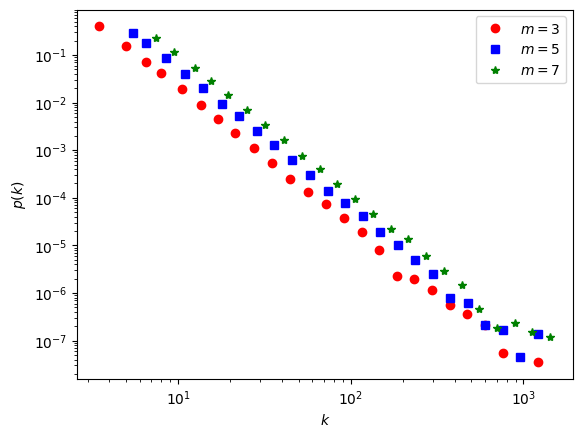

In [9]:
n0 = 3

N = 100000
m = [3,5,7]

G1 = barabasi_albert_graph(n0, N, m[0])
degree_seq1 = [G1.degree(i) for i in G1.nodes()]

G2 = barabasi_albert_graph(n0, N, m[1])
degree_seq2 = [G2.degree(i) for i in G2.nodes()]

G3 = barabasi_albert_graph(n0, N, m[2])
degree_seq3 = [G3.degree(i) for i in G3.nodes()]


# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = False, color = 'r', marker='o', linewidth=0.0, label='$m = $'+str(m[0]))
powerlaw.plot_pdf(degree_seq2, linear_bins = False, color = 'b', marker='s', linewidth=0.0, label='$m = $'+str(m[1]))
powerlaw.plot_pdf(degree_seq3, linear_bins = False, color = 'g', marker='*', linewidth=0.0, label='$m = $'+str(m[2]))
plt.legend(loc=0)

plt.xlabel("$k$")
plt.ylabel("$p(k)$")

Text(0, 0.5, '$p(k)$')

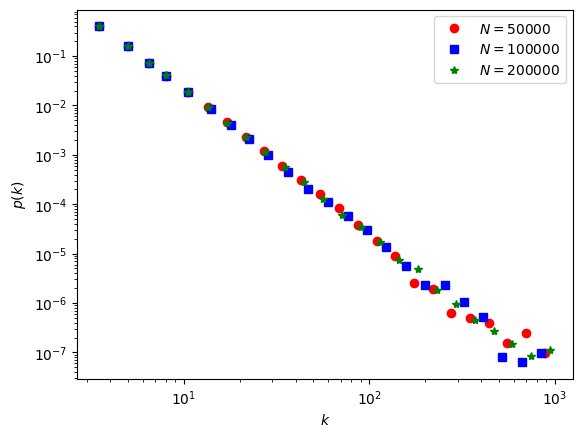

In [10]:
N = [50000,100000,200000]
m = 3

G1 = barabasi_albert_graph(n0, N[0], m)
degree_seq1 = [G1.degree(i) for i in G1.nodes()]

G2 = barabasi_albert_graph(n0, N[1], m)
degree_seq2 = [G2.degree(i) for i in G2.nodes()]

G3 = barabasi_albert_graph(n0, N[2], m)
degree_seq3 = [G3.degree(i) for i in G3.nodes()]

# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = False, color = 'r', marker='o', linewidth=0.0, label='$N = $'+str(N[0]))
powerlaw.plot_pdf(degree_seq2, linear_bins = False, color = 'b', marker='s', linewidth=0.0, label='$N = $'+str(N[1]))
powerlaw.plot_pdf(degree_seq3, linear_bins = False, color = 'g', marker='*', linewidth=0.0, label='$N = $'+str(N[2]))
plt.legend(loc=0)

plt.xlabel("$k$")
plt.ylabel("$p(k)$")

## 对数分箱绘制度分布

In [11]:
from collections import Counter

Text(0, 0.5, 'P(k)')

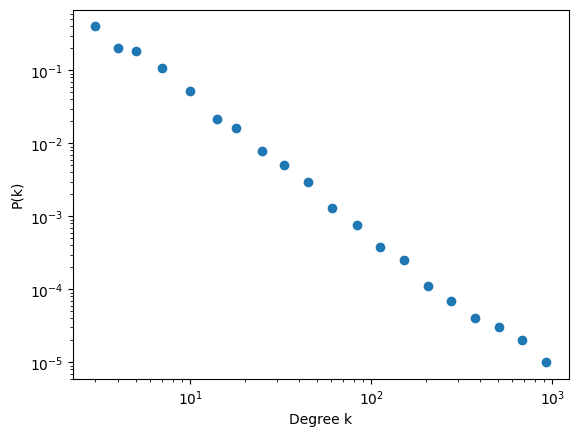

In [12]:
n0 = 3
n = 100000
m = 3

G = barabasi_albert_graph(n0, n, m)
degree = dict(nx.degree(G)).values()
bins = np.round(np.logspace(np.log10(min(degree)), np.log10(max(degree)), 20)) # 对数间隔
cnt = Counter(np.digitize(np.array(list(degree)), bins))

x, y = list(zip(*[(bins[k-1], v/n) for k, v in cnt.items()]))
plt.plot(x, y, 'o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree k")
plt.ylabel("P(k)")

## 绘制累积度分布

Text(0, 0.5, '$P_c(k)$')

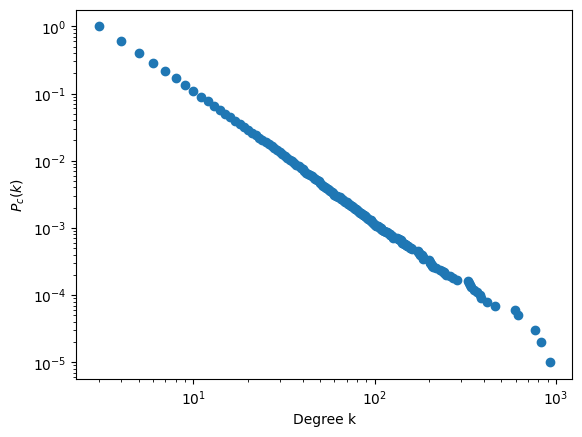

In [13]:
k, Pk = get_pdf(G)
Pck = np.array([sum(Pk[i:]) for i in range(len(Pk))])

plt.plot(k, Pck, 'o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree k")
plt.ylabel("$P_c(k)$")

## BA无标度网络的直径和集聚系数

In [17]:
# plt.rc('font', family='SimHei')

Text(0.5, 1.0, '$<d>$')

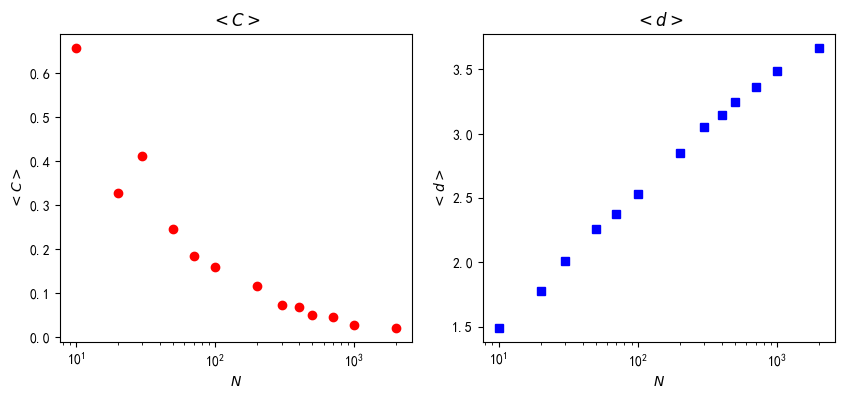

In [18]:
n0 = 3
m = 3

N = [10,20,30,50,70,100,200,300,400,500,700,1000,2000]

# 计算BA无标度网络的平均距离、平均集聚系数与尺寸N的依赖关系
C = [] # 平均集聚系数
L = [] # 平均距离
samples = 1
for n in N:
    s1 = 0
    s2 = 0
    for i in range(samples):
        G = barabasi_albert_graph(n0, n, m)
        s1 += nx.average_clustering(G)
        s2 += nx.average_shortest_path_length(G)

    C.append(s1 / samples)
    L.append(s2 / samples)

    
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(N, C, 'ro')
plt.xlabel("$N$")
plt.ylabel("$<C>$")
plt.xscale("log")
# plt.yscale("log")
plt.title("$<C>$")

plt.subplot(122)
plt.plot(N, L, 'bs')
plt.xlabel("$N$")
plt.ylabel("$<d>$")
plt.xscale("log")
plt.title("$<d>$")

In [20]:
plt.rc('font', family='Times New Roman')

## 随机生长模型（偏好连接的缺失）

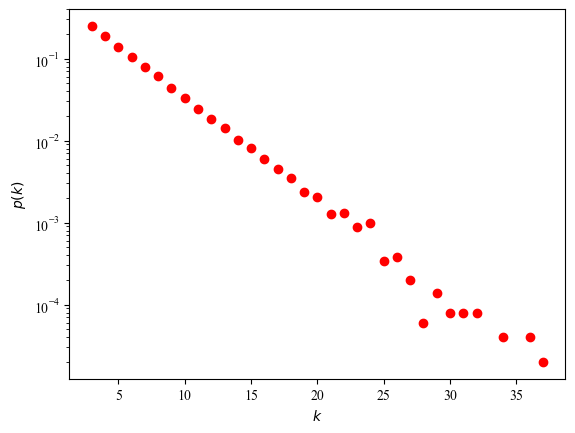

In [21]:
n0 = 3
N = 50000
m = 3

G1 = model_A(n0, N, m)

k, pk = get_pdf(G1)
plt.plot(k, pk, "ro")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p(k)$")
plt.show()

## 非线性生长模型

In [22]:
import igraph as ig

In [23]:
# 定义求度分布的函数(注意是针对igraph类型的图)
def get_pdf_igraph(G):
    all_k = G.degree()
    k = list(set(all_k))  # 获取所有可能的度值
    N = len(all_k)

    Pk = []
    for ki in sorted(k):
        c = 0
        for i in G.vs:
            if G.degree(i) == ki:
                c += 1
        Pk.append(c / N)

    return sorted(k), Pk

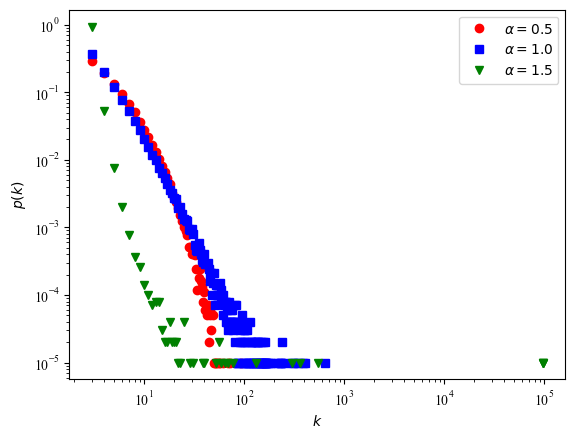

In [24]:
n = 100000
m = 3
alpha1 = 0.5
alpha2 = 1.0
alpha3 = 1.5

G1 = ig.Graph.Barabasi(n, m, directed=False, power=alpha1)
G2 = ig.Graph.Barabasi(n, m, directed=False, power=alpha2)
G3 = ig.Graph.Barabasi(n, m, directed=False, power=alpha3)


k1, pk1 = get_pdf_igraph(G1)
k2, pk2 = get_pdf_igraph(G2)
k3, pk3 = get_pdf_igraph(G3)
plt.plot(k1, pk1, "ro", label=r'$\alpha = 0.5$')
plt.plot(k2, pk2, "bs", label=r'$\alpha = 1.0$')
plt.plot(k3, pk3, "gv", label=r'$\alpha = 1.5$')
plt.legend(loc=0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$p(k)$")
plt.show()

## 比安科尼-巴拉巴西模型

In [29]:
def bianconi_barabasi_model(n0, n, m, etas, i0, i1, i2):
    # 初始化网络
    G = nx.complete_graph(n0)
    degrees = np.zeros(n)
    for i in range(n0):
        degrees[i] = n0-1
    
    # 记录节点i0, i1, i2三个节点的度值
    deg_i0 = []
    deg_i1 = []
    deg_i2 = []
        
    # 生成网络
    for j in range(n0, n):
        if i0 < len(G.nodes()):
            deg_i0.append(G.degree(i0))
        if i1 < len(G.nodes()):
            deg_i1.append(G.degree(i1))
        if i2 < len(G.nodes()):
            deg_i2.append(G.degree(i2))
        
        
        # 计算节点的连接概率
        probabilities = etas[:j] * degrees[:j]
        probabilities /= np.sum(probabilities)
        
        # 选择节点连接
        targets = np.random.choice(j, size=m, replace=False, p=probabilities)
        
        # 更新网络和节点度
        for j0 in range(m):
            G.add_edge(j, targets[j0])
            degrees[targets[j0]] += 1
            
        degrees[j] = m
    
    return G, deg_i0, deg_i1, deg_i2



Text(0, 0.5, '$k(t)$')

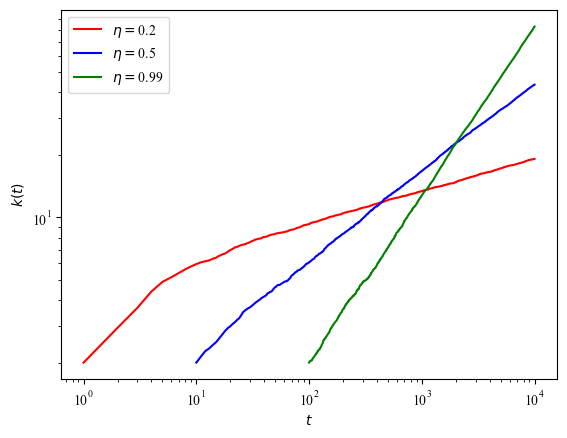

In [32]:
n0 = 3
n = 10000
m = 2
etas = np.random.uniform(0, 1, n)

# 设置指定节点的适应度值
i0, i1, i2 = 1, 10, 100
etas[i0] = 0.2
etas[i1] = 0.5
etas[i2] = 0.99


samples = 100
y0 = np.zeros(9997)
y1 = np.zeros(9989)
y2 = np.zeros(9899)
for i in range(samples):
    G, deg_i0, deg_i1, deg_i2 = bianconi_barabasi_model(n0, n, m, etas, i0, i1, i2)
    y0 += np.array(deg_i0)
    y1 += np.array(deg_i1)
    y2 += np.array(deg_i2)

# 绘制指定节点的度与时间的依赖关系
plt.plot(range(i0, i0+len(y0)), y0 / samples, 'r-', label=r'$\eta = $'+str(etas[i0]))
plt.plot(range(i1, i1+len(y1)), y1 / samples, 'b-', label=r'$\eta = $' + str(etas[i1]))
plt.plot(range(i2, i2+len(y2)), y2 / samples, 'g-', label=r'$\eta = $' + str(etas[i2]))


plt.legend(loc=0)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('$t$')
plt.ylabel('$k(t)$')